In [1]:
import numpy as np
# initialize parameters randomly
d = 2 # diensionality / number of inputs
n = 3 # Number of classes (A/B/C) / Number of neurons in output layer
h = 4 # neurons in hidden layer

In [2]:
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

In [3]:
import pandas as pd

In [4]:
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk 
df = pd.read_csv("/content/spiral.csv")

# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 12.0MB/s]


In [5]:
m = len(X)
lr = 1e-0
m

300

```python
# FWD Prop
Z1 = np.dot(X, W1) + b1
A1 = np.maximum(0, Z1)  # relu

Z2 = np.dot(A1, W2) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True) # softmax

probs = A2
# Loss
loss = np.mean(-np.log(probs[range(m), y]))

# Early Stopping ??

### Back Prop
dZ2 = probs
dZ2[range(m), y] -= 1
dZ2 = dZ2 / m

dW2 = np.dot(A1.T, dZ2)
db2 = np.sum(dZ2, axis=0, keepdims=True)

dA1 = np.dot(dZ2, W2.T)
dA1[Z1 < 0] = 0
dZ1 = dA1

dW1 = np.dot(X.T, dZ1)
db1 = np.sum(dZ1, axis=0, keepdims=True)

W1 += -lr * dW1
b1 += -lr * db1
W2 += -lr * dW2
b2 += -lr * db2
```

In [6]:
class NN:
    
    def __init__(self, n_features, n_hidden, n_classes):
        self.d = n_features
        self.h = n_hidden
        self.n = n_classes
        self.W1 = 0.01 * np.random.randn(self.d, self.h)
        self.b1 = np.zeros((1,self.h))
        self.W2 = 0.01 * np.random.randn(self.h,self.n)
        self.b2 = np.zeros((1,self.n))
     
    def fwd_prop(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        Z2 = np.exp(Z2)
        A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
        return A1, A2
    
    def cce_loss(self, y, probs):
        num_examples = y.shape[0]
        correct_logprobs = -np.log(probs[range(num_examples),y])
        loss = np.sum(correct_logprobs)/num_examples
        return loss  
    
    def back_prop(self, X, A1, A2, y):
        # compute the gradient on scores
        num_examples = y.shape[0]
        dZ2 = A2
        dZ2[range(num_examples),y] -= 1
        dZ2 /= num_examples
        # first backprop into parameters W2 and b2
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        # next backprop into hidden layer, A1
        dA1 = np.dot(dZ2, self.W2.T)
        # backprop the ReLU non-linearity
        dA1[A1 <= 0] = 0
        # finally into W,b
        dZ1 = dA1
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        return dW1, db1, dW2, db2       
    
    def fit(self, X, lr, reg, max_iters):
        num_examples = X.shape[0]
        for i in range(max_iters):
            #foward prop
            A1, A2 = self.fwd_prop(X)
            # calculate loss
            data_loss = self.cce_loss(y, A2)
            # reg_loss = 0.5*reg*np.sum(self.W1*self.W1) + 0.5*reg*np.sum(self.W2*self.W2)
            loss = data_loss #+ reg_loss
            
            if i % 1000 == 0:
                print("iteration %d: loss %f" % (i, loss))
        
            dW1, db1, dW2, db2  = self.back_prop(X, A1, A2, y)
          
            # perform a parameter update
            self.W1 += -lr * dW1
            self.b1 += -lr * db1
            self.W2 += -lr * dW2
            self.b2 += -lr * db2
        
    def predict(self, X):
        A1 = np.maximum(0, np.dot(X, self.W1) + self.b1) # ReLU(Z1) = ReLU(W1T. X + b1)
        Z2 = np.dot(A1, self.W2) + self.b2 # Z2 = W2T.A1 + b2 => 3 probab
        # A2 = omited for efficiency
        y_hat = np.argmax(Z2, axis=1) # taking index of max probab
        return y_hat
    
nn_model = NN(n_features=2, n_hidden=100, n_classes=3)
nn_model.fit(X, lr=1, reg=1e-3, max_iters=10000)
print('training accuracy: %.2f' % (np.mean(nn_model.predict(X) == y)))

iteration 0: loss 1.098739
iteration 1000: loss 0.115885
iteration 2000: loss 0.045450
iteration 3000: loss 0.033898
iteration 4000: loss 0.028453
iteration 5000: loss 0.025163
iteration 6000: loss 0.022966
iteration 7000: loss 0.021399
iteration 8000: loss 0.020222
iteration 9000: loss 0.019291
training accuracy: 0.99


In [7]:
from matplotlib import pyplot as plt

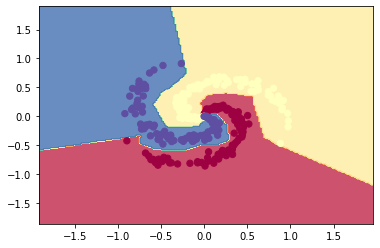

In [8]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid

y_hat = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [9]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', 
                    alpha=1e-5,
                    hidden_layer_sizes=(4), 
                    random_state=100, 
                    learning_rate_init=1,
                    activation='relu', 
                    max_iter=5000)
mlp.fit(X, y)
print(mlp.score(X, y))

0.74


## Tensorflow

-- Google

In [10]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [12]:
model = Sequential([
      Dense(4, activation="relu", input_shape=(2,), name='H1'), 
      Dense(3, activation="softmax", name='out')
])

In [13]:
for param in model.weights:
  print(param.shape)

(2, 4)
(4,)
(4, 3)
(3,)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 H1 (Dense)                  (None, 4)                 12        
                                                                 
 out (Dense)                 (None, 3)                 15        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


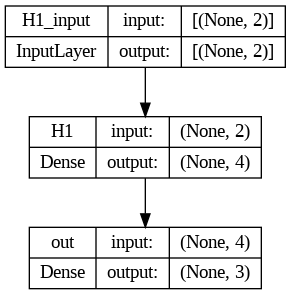

In [15]:
from tensorflow.keras.utils import plot_model

plot_model(model, 
    to_file='model.png', 
    show_shapes=True, show_layer_names=True)

In [16]:
model = Sequential([
      Dense(4, activation="relu", input_shape=(2,), kernel_initializer='random_uniform', bias_initializer="zeros"),
      Dense(3, activation="softmax", kernel_initializer='he_uniform', bias_initializer='ones')
])

In [17]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.5),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [18]:
y = pd.get_dummies(y).to_numpy()

In [19]:
y.shape

(300, 3)

In [20]:
model.fit(X, y, epochs=100, batch_size=300, validation_split=0.2, verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.0961 - accuracy: 0.3792 - val_loss: 2.5378 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 79ms/step - loss: 1.1096 - accuracy: 0.4417 - val_loss: 2.4999 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 55ms/step - loss: 1.0556 - accuracy: 0.5750 - val_loss: 2.2861 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 44ms/step - loss: 0.8653 - accuracy: 0.6208 - val_loss: 2.0090 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 50ms/step - loss: 0.7589 - accuracy: 0.6458 - val_loss: 1.9135 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 0.7511 - accuracy: 0.6208 - val_loss: 2.0645 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 55ms/step - loss: 0.7444 - accuracy: 0.6833 - val_loss: 2.3740 - val_accuracy: 0.000